# Your info

Full name: Babak Behkam Kia

Student ID: 98521099

# Q2

In [26]:
# Q2_graded
from tensorflow import keras
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train = X_train / 255

In [27]:
# Q2_graded
import random

mnist_dict = {
              0:[],
              1:[],
              2:[],
              3:[],
              4:[],
              5:[],
              6:[],
              7:[],
              8:[],
              9:[]
             }
for i in range(len(y_train)):
    mnist_dict[y_train[i]].append(i)

In [28]:
# Q2_graded
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets

In [29]:
# Q2_graded
class Hopfield:
    def __init__(self, train_data):
        train_data = np.array(train_data)
        dims = train_data.shape
        self.weights = np.zeros((dims[1], dims[1]))
        sum = 0
        count = 0
        for i in range(len(train_data)):
            for j in range(len(train_data[i])):
                sum += train_data[i][j]
                count += 1
        mean = sum / count
        for item in train_data:
            self.weights += np.outer(item - mean, item - mean)
        for i in range(dims[1]):
            self.weights[i, i] = 0
        self.weights /= len(train_data)

    def update(self, x):
        delta = self.weights.dot(x)
        result = []
        for i in delta:
            if i >= 0:
                result.append(1)
            else:
                result.append(-1)
        return np.array(result)

def Add_Noise(data, noise):   
    data = data.reshape((10,-1))
    for i in range(data.shape[0]):
        s = np.random.binomial(1, noise, data.shape[1])
        for j in range(data.shape[1]):
            if s[j] == 1:
                data[i][j] *= -1
    return data

def compute_accuracy(true_image, removed_noise_image):
    return 1 - np.sum(true_image != removed_noise_image) / 784

In [30]:
# Q2_graded
noises = [0.1, 0.3, 0.6]
Hopfield_sizes = [2, 200, 20000]
final_acc = {}

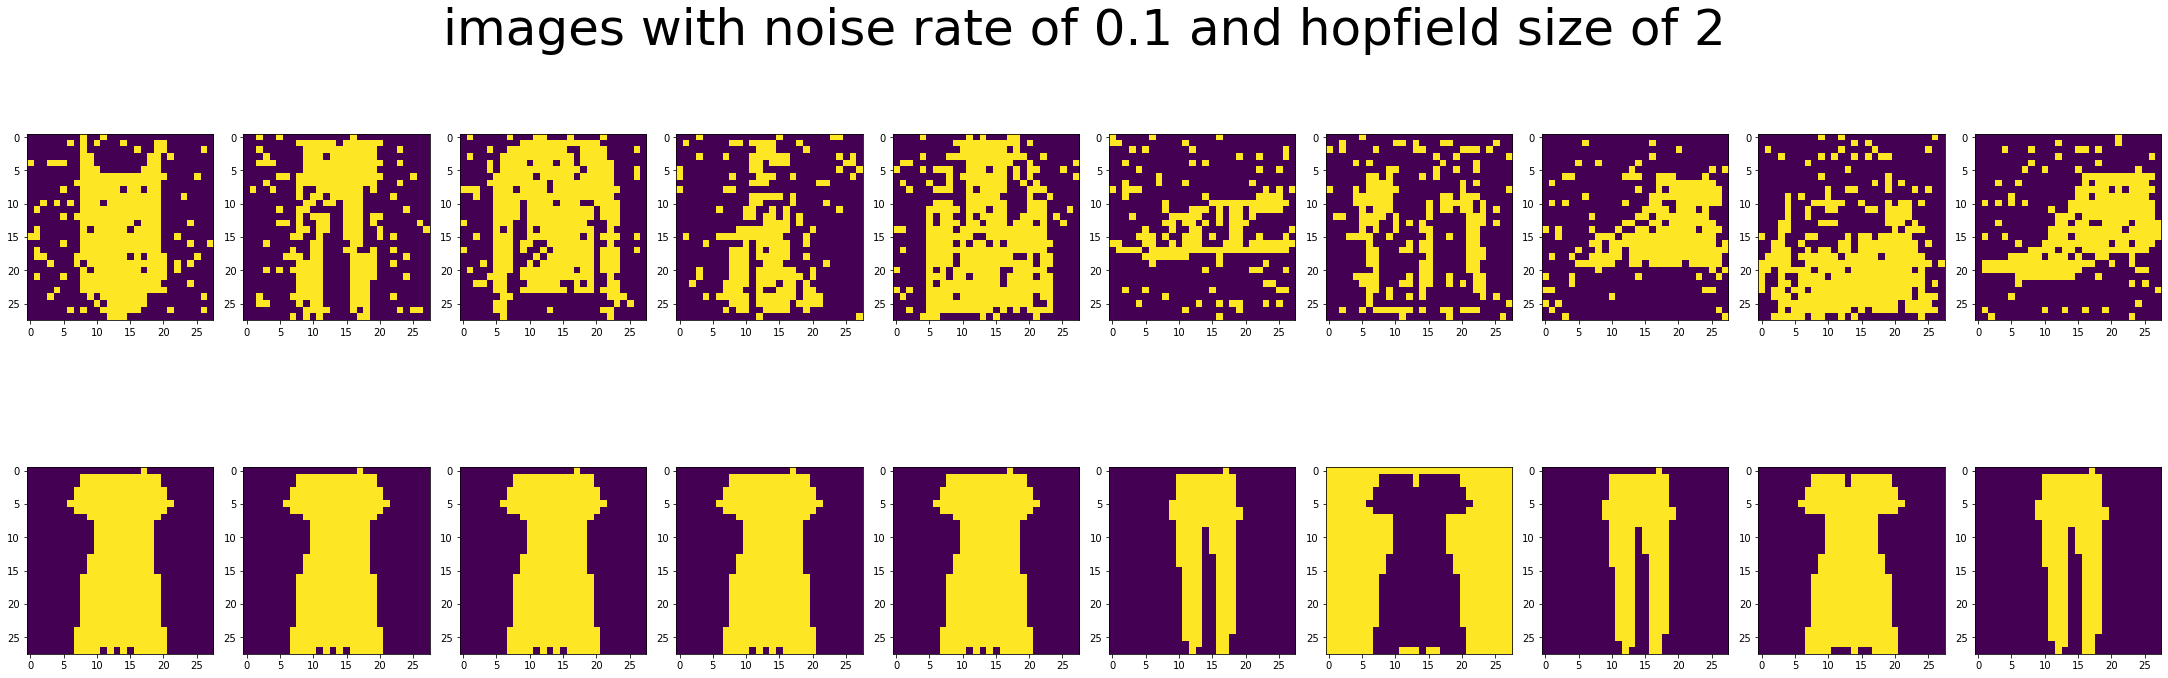

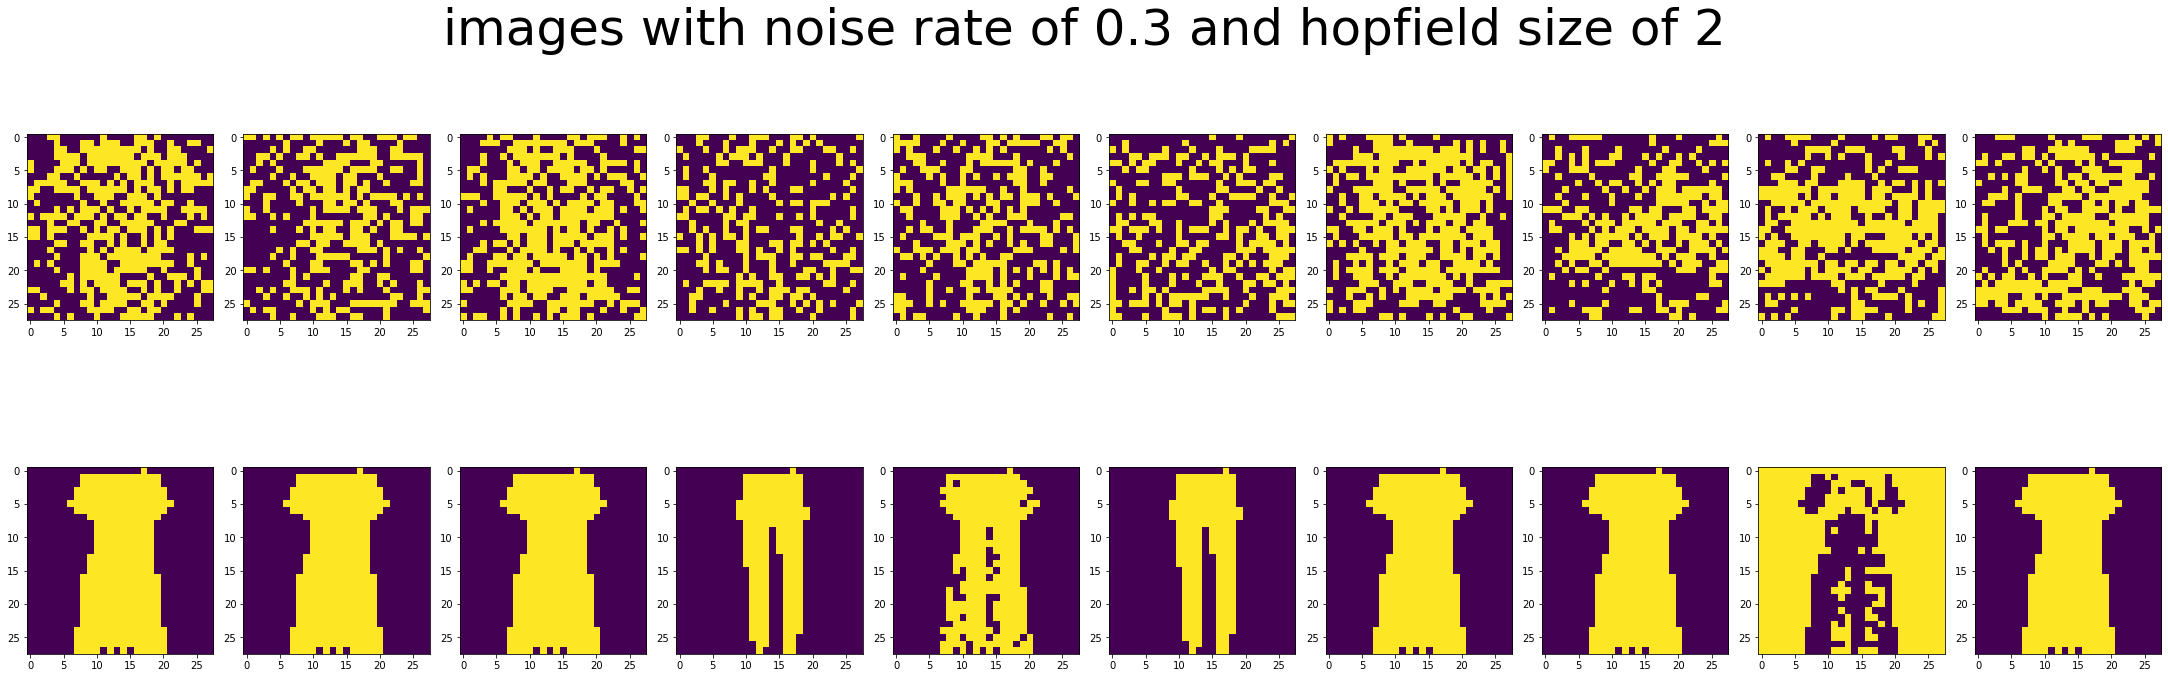

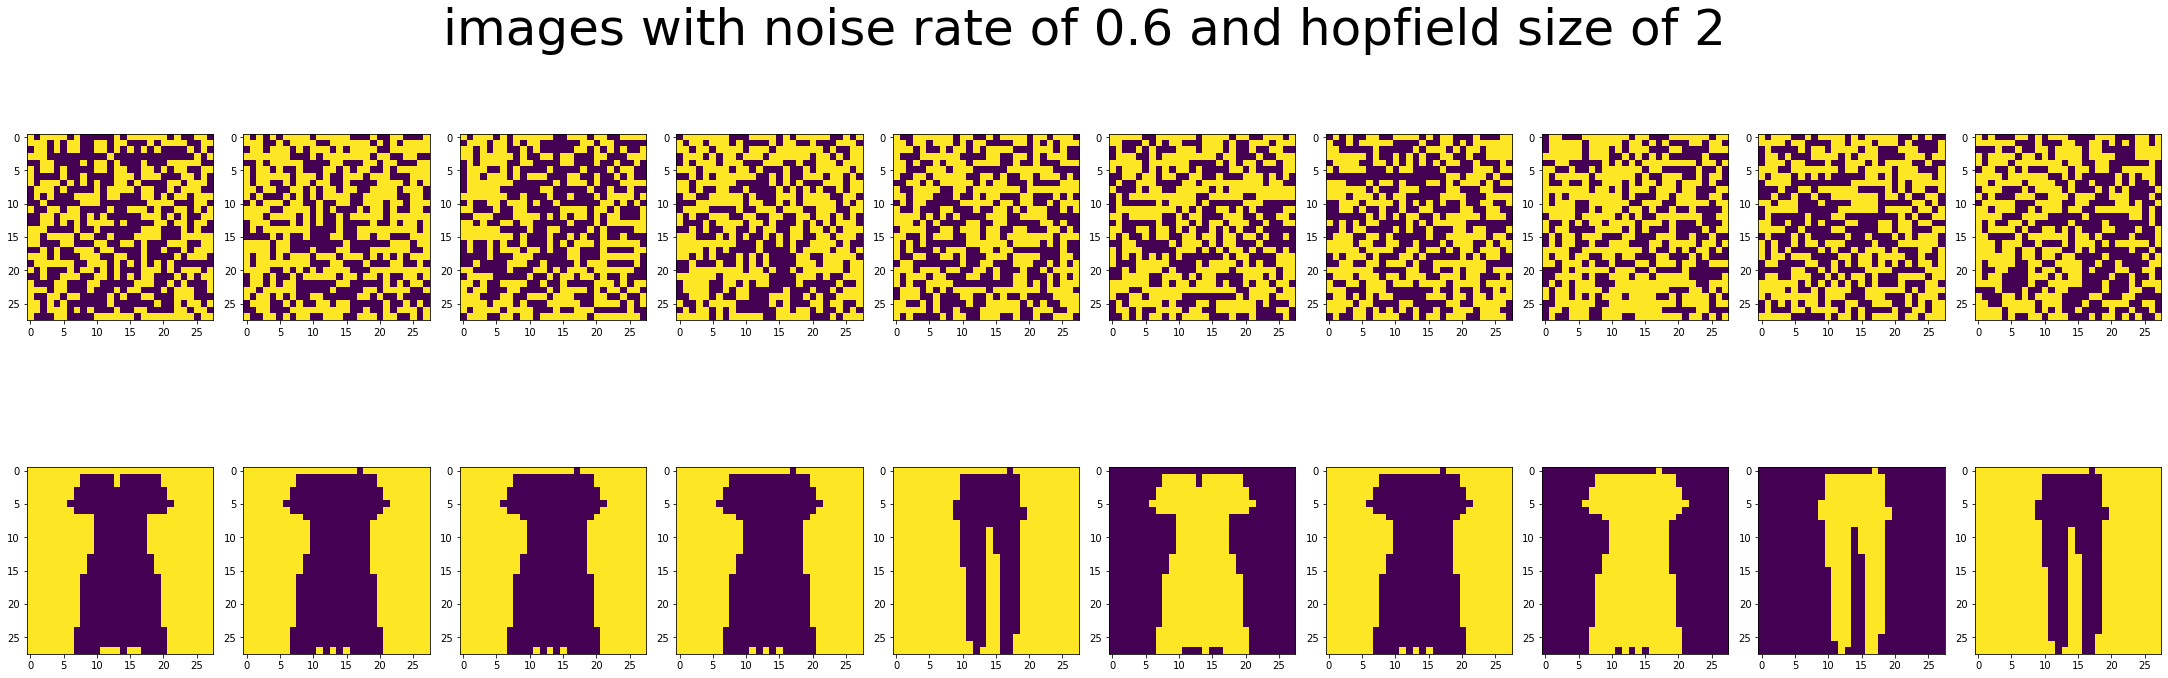

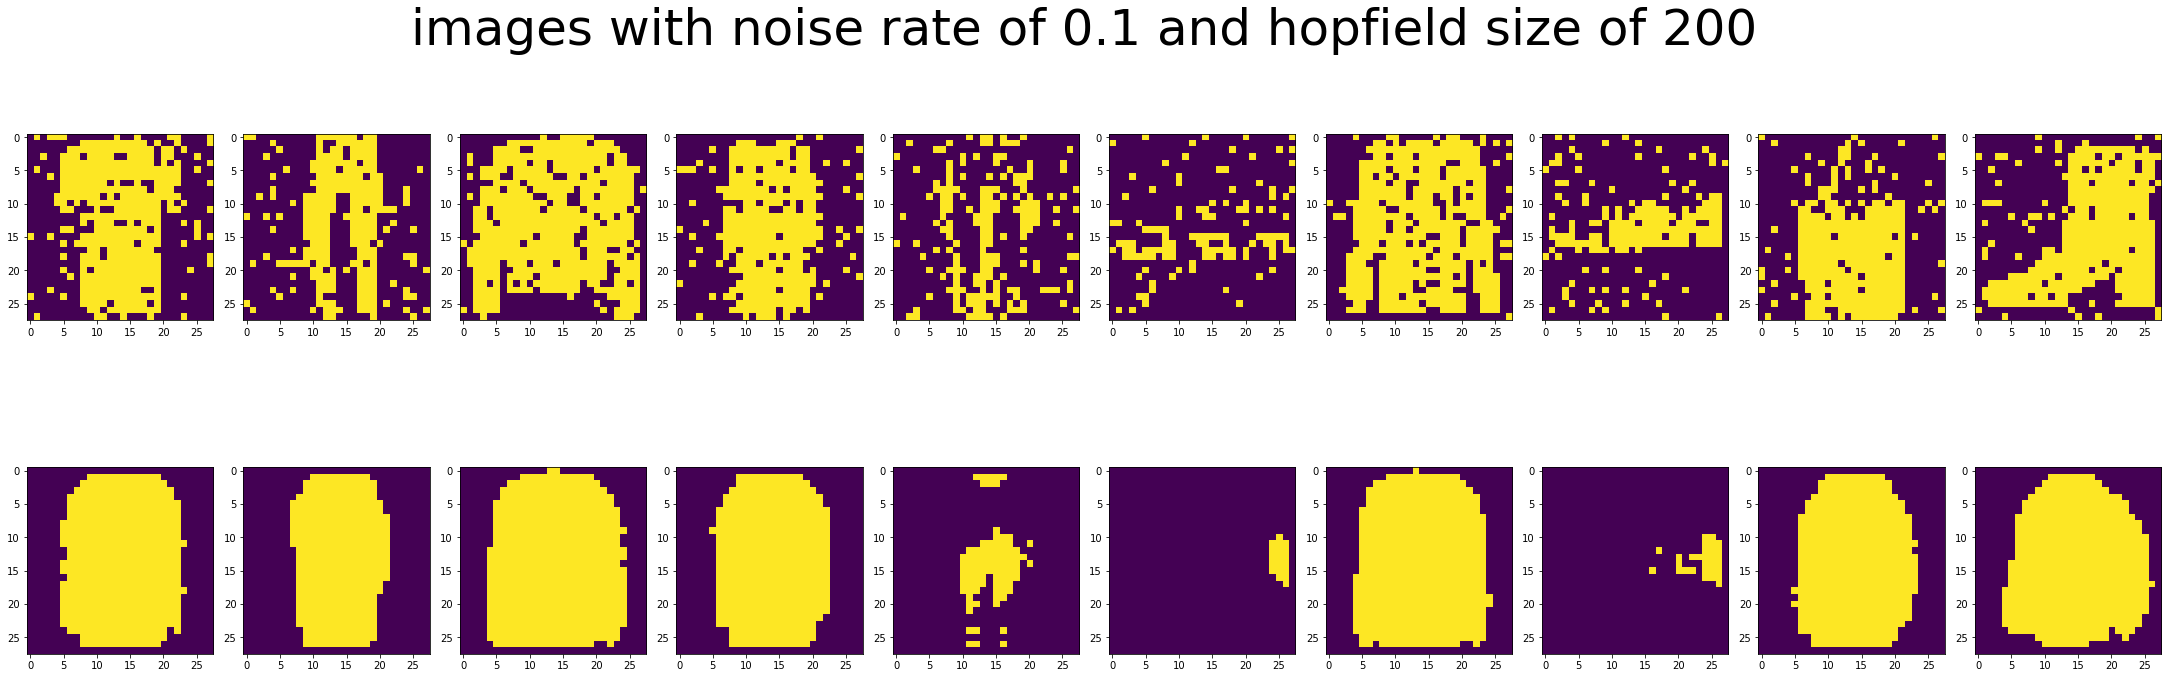

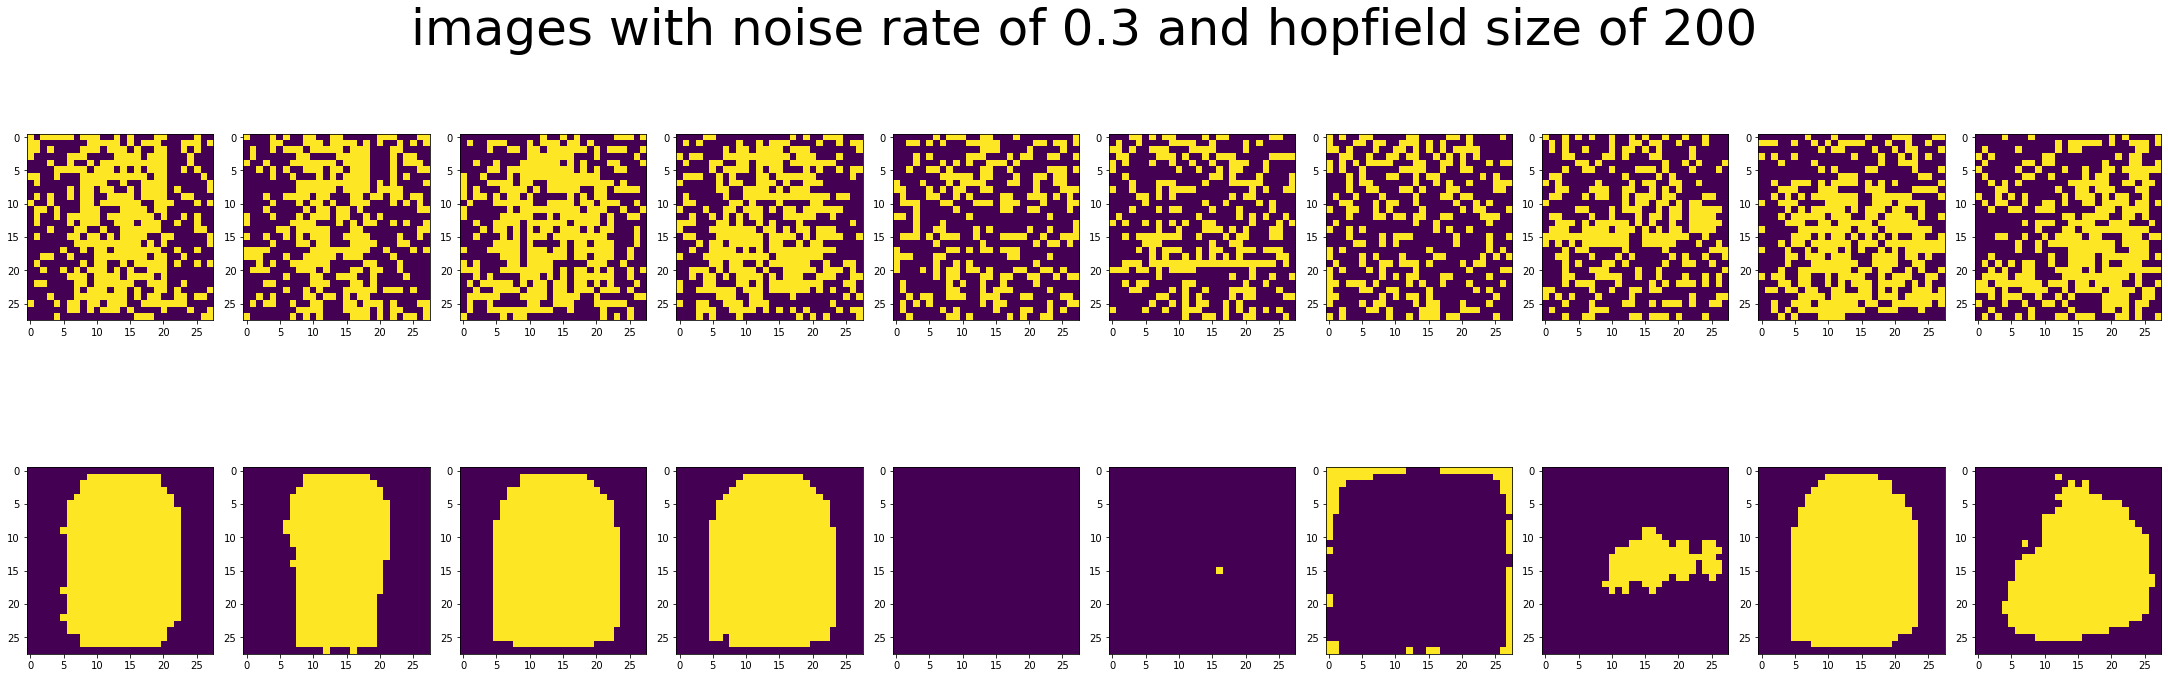

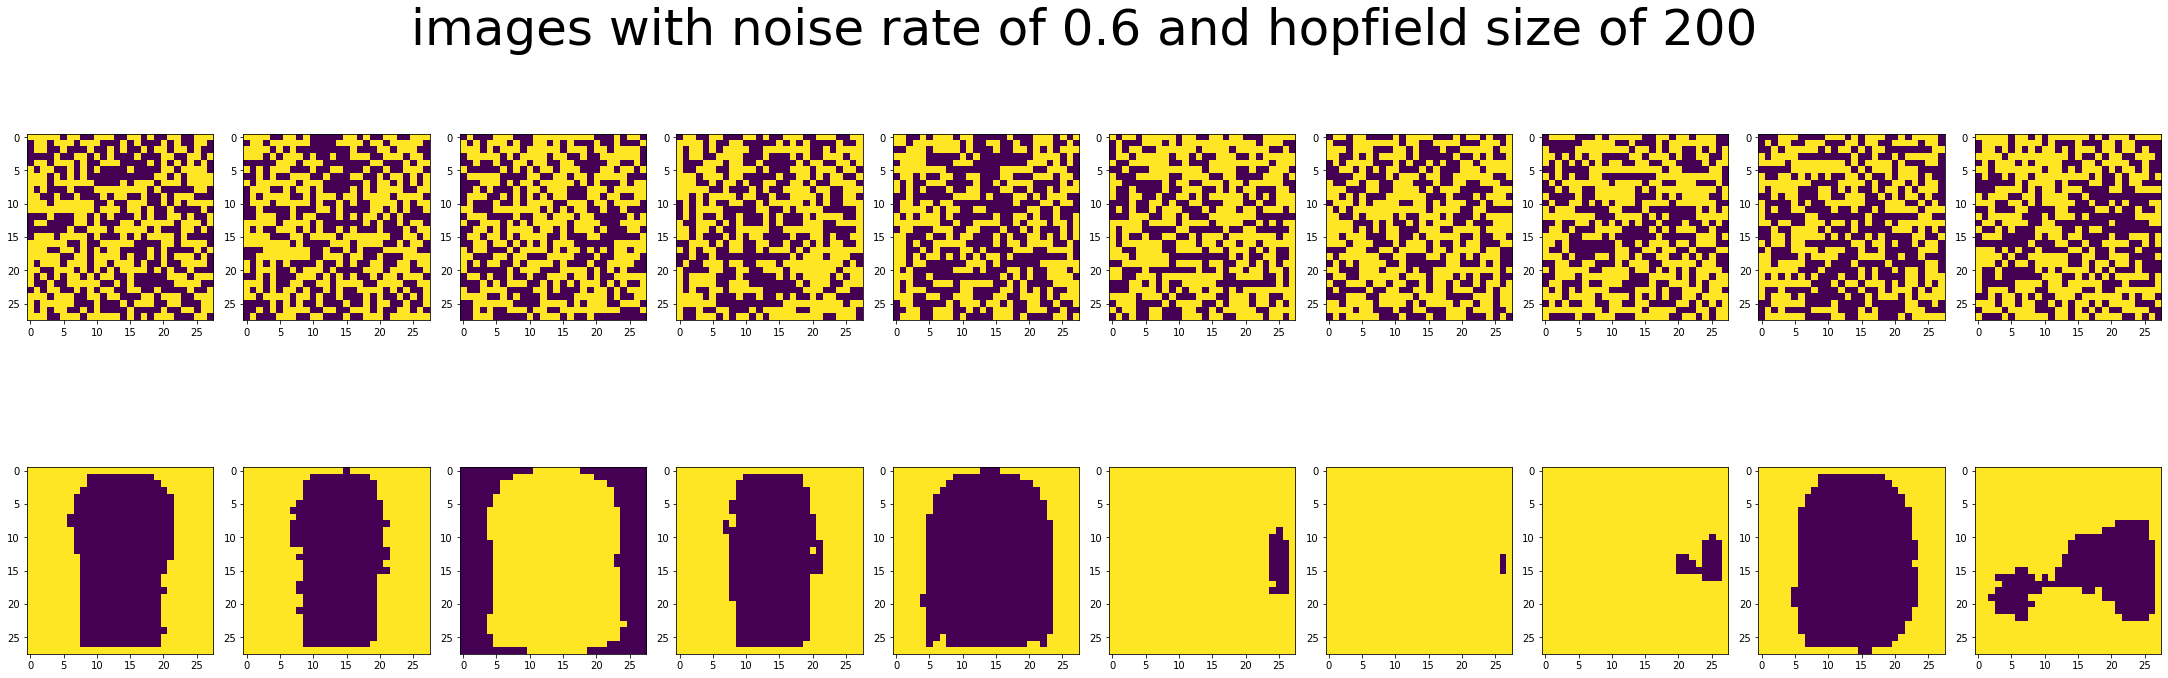

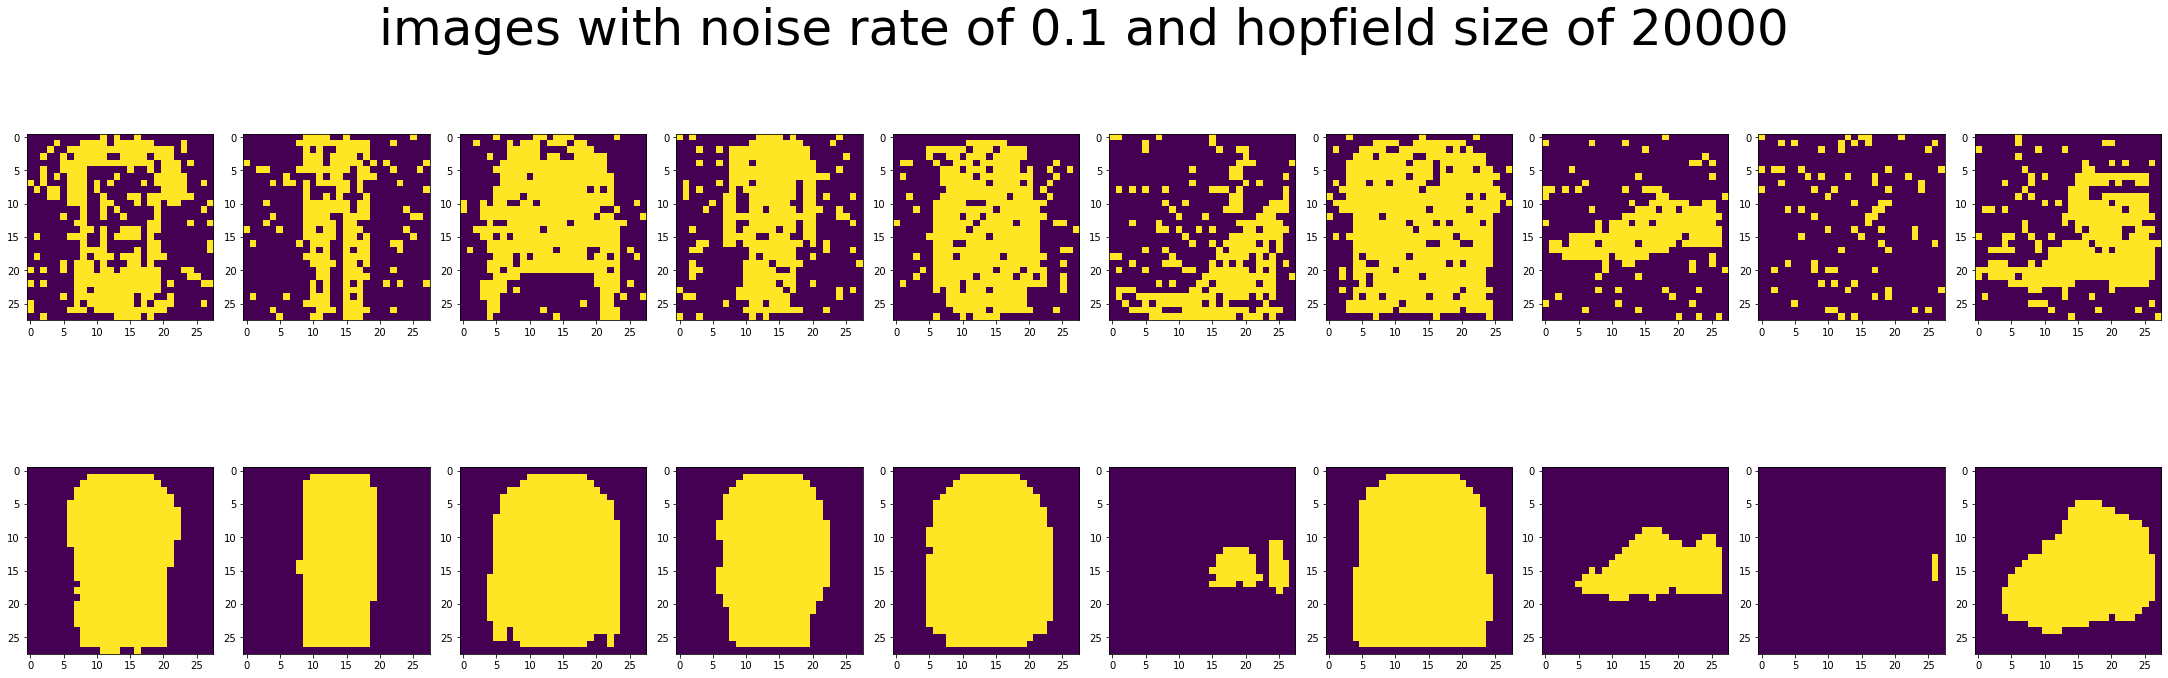

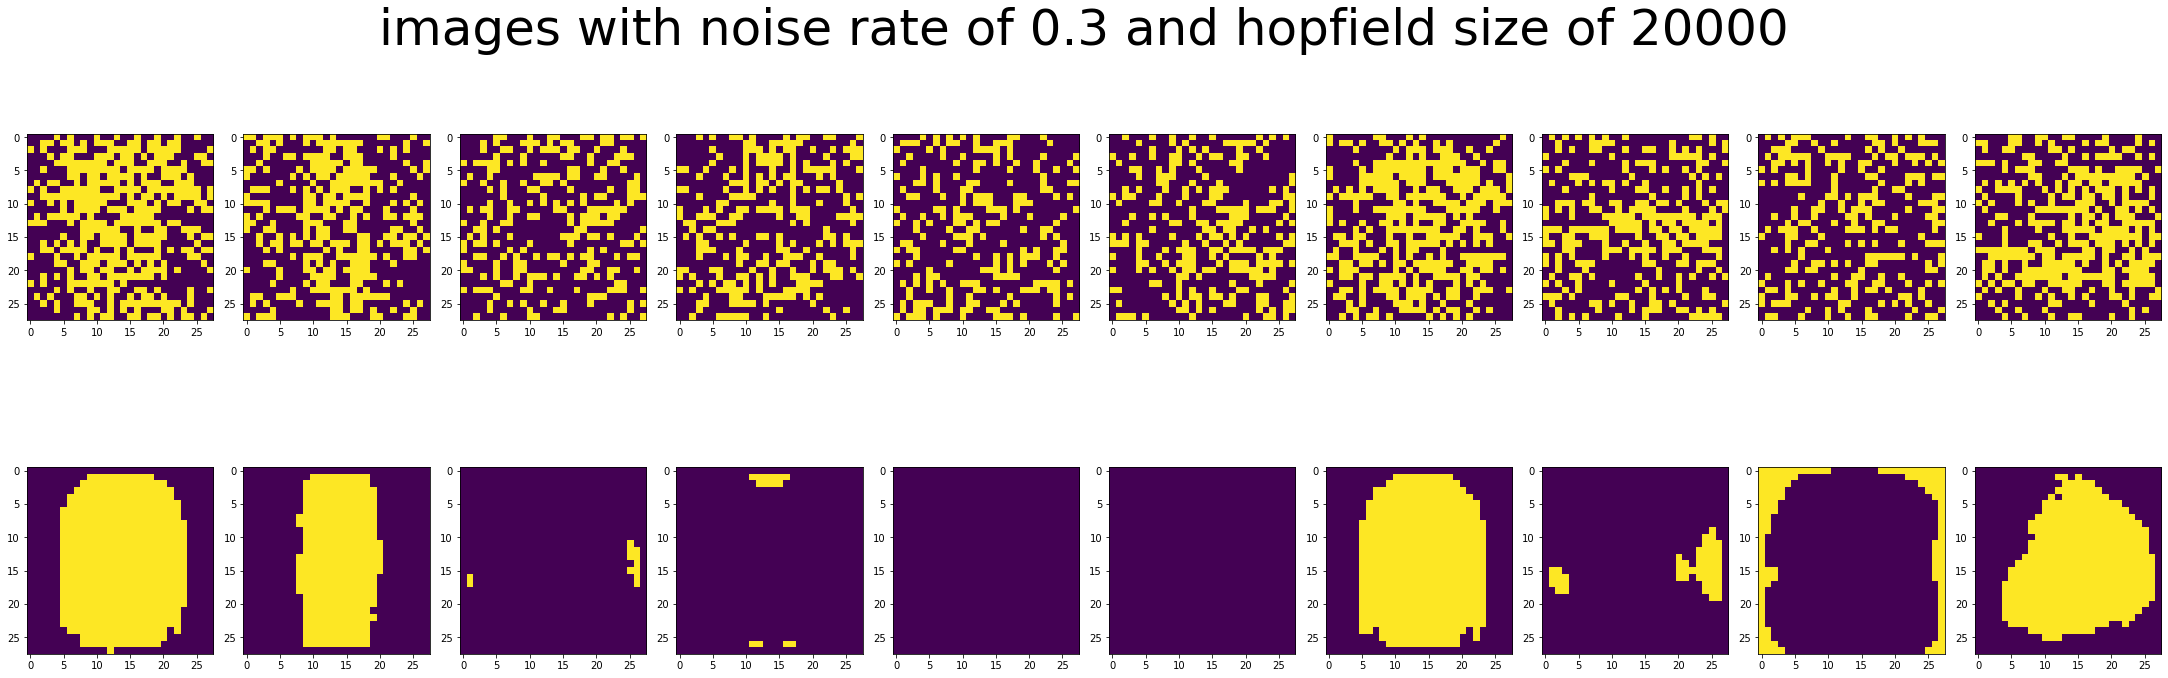

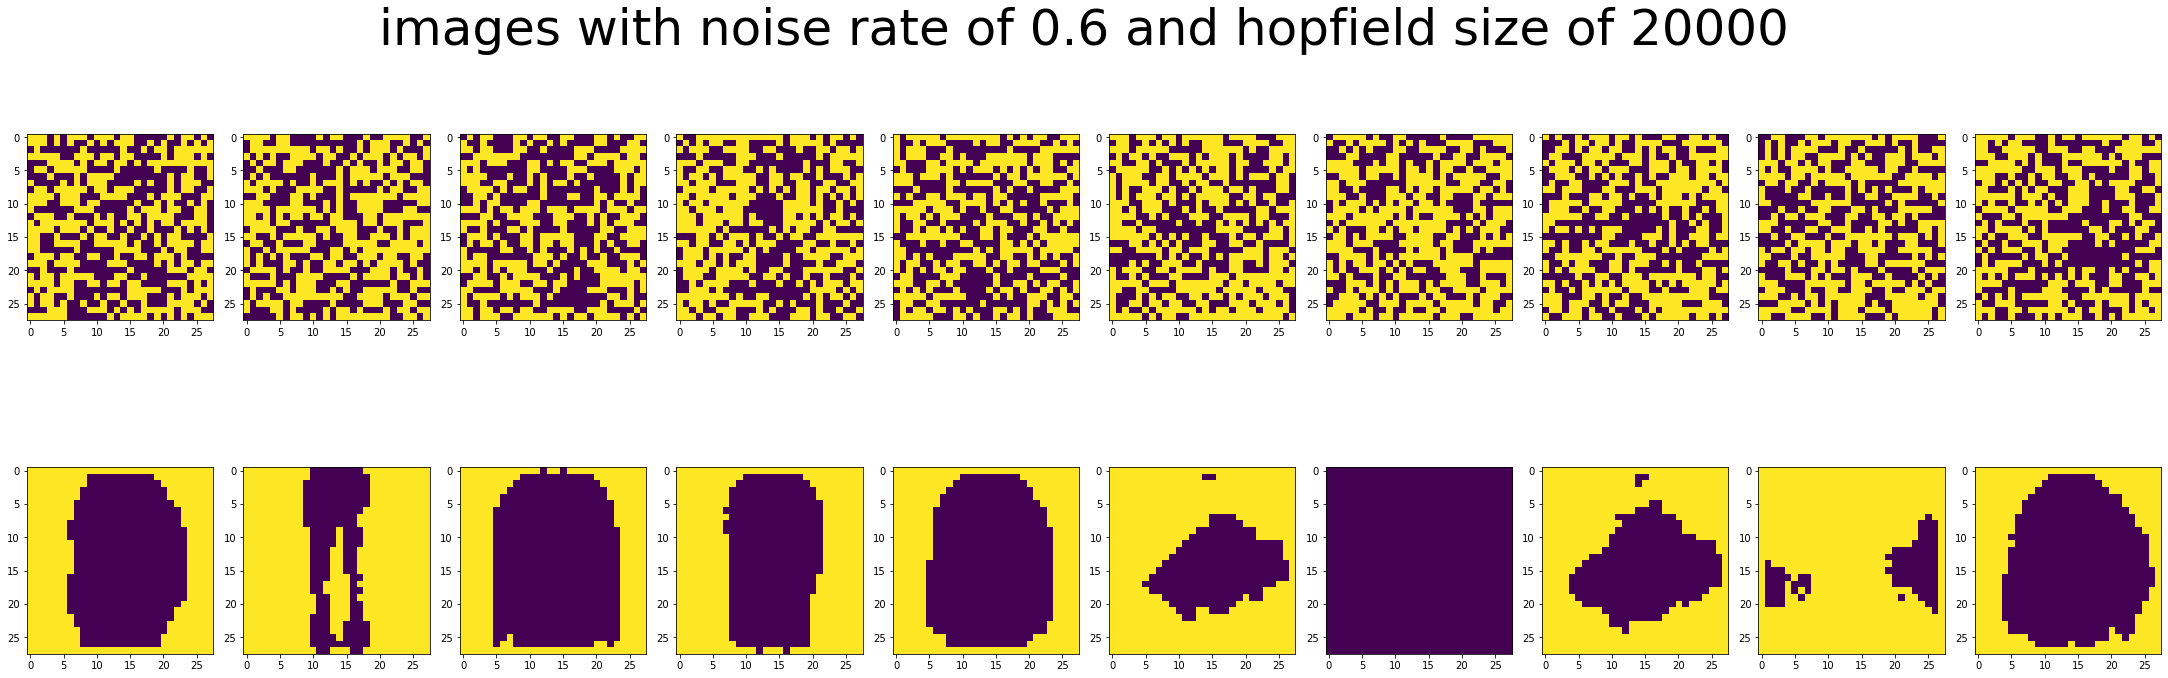

In [31]:
# Q2_graded
for i in range(3):
    indexes = np.random.randint(0, len(X_train), size=Hopfield_sizes[i])
    items = X_train[indexes]

    train = []
    for item in items:
        train.append(np.sign(item.reshape(-1) * 2 - 1))

    for j in range(3):
        indexes = []
        for k in range(10):
            indexes += random.sample(mnist_dict[k], 1)

        data_copy = X_train[indexes]
        sign_data = np.array([np.sign(t.reshape(-1) * 2 - 1) for t in data_copy])
        data_noise = Add_Noise(sign_data, noise=noises[j])

        fig = plt.figure(figsize=(30, 10), constrained_layout=True)
        spec = fig.add_gridspec(2, 10)
        axs = {}
        count_x = 0
        count_y = 0
        for noisy in data_noise:
            axs[f"ax{count_x * 10 + count_y}"] = fig.add_subplot(spec[count_x, count_y])
            axs[f"ax{count_x * 10 + count_y}"].imshow(noisy.reshape(28, 28))
            count_y += 1

        hf = Hopfield(train)

        count_x += 1
        count_y = 0
        accuracies = []
        
        for index in range(len(data_noise)):
            pred = hf.update(data_noise[index])
            axs[f"ax{count_x * 10 + count_y}"] = fig.add_subplot(spec[count_x, count_y])
            axs[f"ax{count_x * 10 + count_y}"].imshow(pred.reshape(28, 28))
            accuracies.append(compute_accuracy(sign_data[index], pred))
            count_y += 1
        
        final_acc[(Hopfield_sizes[i], noises[j])] =np.max(accuracies)
        
        fig.suptitle(f"images with noise rate of {noises[j]} and hopfield size of {Hopfield_sizes[i]}",fontsize = 50)

In [25]:
# Q2_graded
!pip install tabulate
from tabulate import tabulate
keys = list(final_acc.keys())
data = [[f"{keys[0][1] * 100}%", f'{final_acc[keys[0]]}',f'{final_acc[keys[3]]}',f'{final_acc[keys[6]]}'],
        [f"{keys[1][1] * 100}%", f'{final_acc[keys[1]]}',f'{final_acc[keys[4]]}',f'{final_acc[keys[7]]}'],
        [f"{keys[2][1] * 100}%", f'{final_acc[keys[2]]}',f'{final_acc[keys[5]]}',f'{final_acc[keys[8]]}'],]
col_names = ["Noise \ Network Size",f'n1={keys[0][0]}',f'n2={keys[3][0]}',f'n3={keys[6][0]}']
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒════════════════════════╤══════════╤══════════╤════════════╕
│ Noise \ Network Size   │     n1=2 │   n2=200 │   n3=20000 │
╞════════════════════════╪══════════╪══════════╪════════════╡
│ 10.0%                  │ 0.753827 │ 0.862245 │   0.835459 │
├────────────────────────┼──────────┼──────────┼────────────┤
│ 30.0%                  │ 0.665816 │ 0.67602  │   0.678571 │
├────────────────────────┼──────────┼──────────┼────────────┤
│ 60.0%                  │ 0.563776 │ 0.593112 │   0.580357 │
╘════════════════════════╧══════════╧══════════╧════════════╛


# Q3

In [ ]:
# Q3_graded
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
# Q3_graded
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Q3_graded
path = "/content/drive/My Drive/CI/"

cities = pd.read_csv(path + "Cities.csv",sep=' ', names=['city_index', 'x', 'y'], header=None)

In [ ]:
# Q3_graded
cities.head()

,city_index,x,y
0,1,24748.3333,50840.0000
1,2,24758.8889,51211.9444
2,3,24827.2222,51394.7222
3,4,24904.4444,51175.0000
4,5,24996.1111,51548.8889


In [ ]:
# Q3_graded
def plot_path(cities, dots, epoch):
    fig = plt.figure(figsize=(5, 5))
    axis = fig.add_axes([0,0,1,1])
    axis.scatter(cities['x'], cities['y'], color='red')
    axis.plot(dots[:,0], dots[:,1], color='blue', linewidth=1)
    plt.title(f"founded path until epoch {epoch}")
    plt.show()
    plt.close()

In [ ]:
# Q3_graded
learning_rate = 1
epochs = 50000
n = cities.shape[0] * 10
weights = np.random.rand(n, 2)

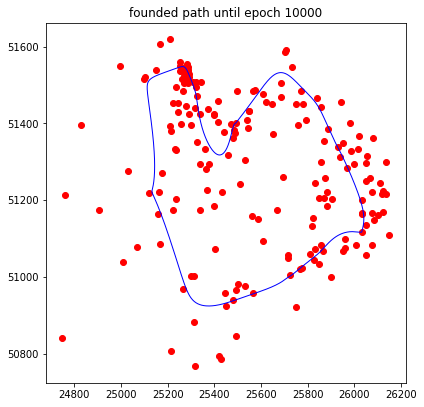

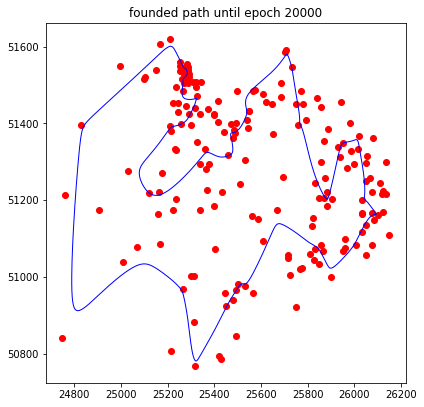

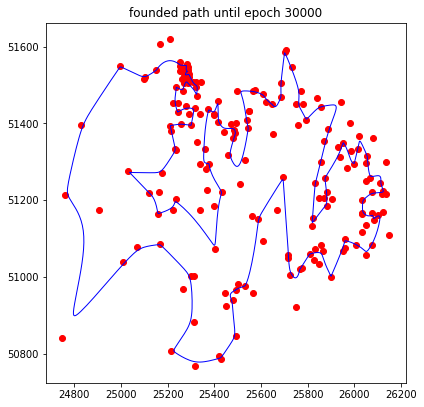

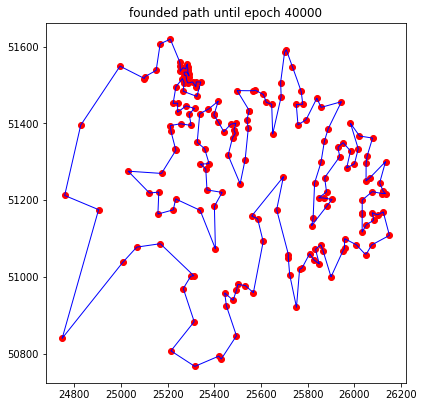

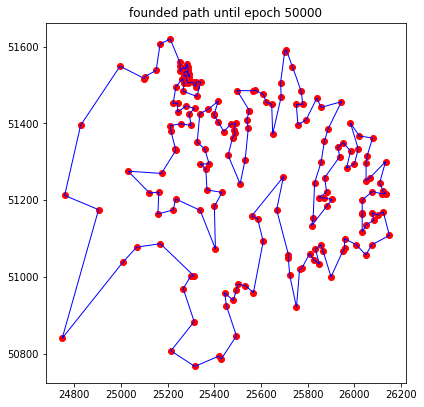

In [ ]:
# Q3_graded
for epoch in range(1, epochs+1):
    city_index = random.randint(0, cities.shape[0]-1)  
    city_value = cities.iloc[city_index][['x', 'y']].values
    closest = np.argmin(np.linalg.norm(weights - city_value, axis=1))

    radix = np.max([n//10, 1])
    deltas = np.abs(closest - np.arange(weights.shape[0]))
    distances = np.minimum(deltas, weights.shape[0] - deltas)

    gaussian = np.exp(-(1/2)*(distances**2) / radix**2)
    weights -= gaussian[:,np.newaxis] * learning_rate * (weights - city_value)

    if epoch % 100 == 0:
          learning_rate = learning_rate * 0.999
          n = n * 0.99
    if epoch % 10000 == 0:
          plot_path(cities, weights, epoch)

In [ ]:
# Q3_graded
best_cities = []
for i in range(cities.shape[0]):
    city_axis = list(cities.iloc[i][['x', 'y']])
    val = np.argmin(np.linalg.norm(weights - city_axis, axis=1))
    best_cities.append((i, val))

best_cities.sort(key=lambda x: x[1])
path = [index for index,val in best_cities]
path = cities.reindex(path)[['x','y']]
best_distance = np.sum(np.linalg.norm(path - np.roll(path, 1, axis=0), axis=1))
print(best_distance)

9816.123205859902


# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID.
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
    - **Note**: if you want to add more cells, add this to the **first** line of the cell:
  ```python
  # Q1_graded
  ```
  according to the question number.
  - There are 2 assignments in Gradescope:
  
    You should upload your **codes** and your **notebook** in `HW3` section and your final report for all of the questions as a **single pdf** file in `HW3 - Report`. Autograder will automatically check for:
    - `CI002_HW3.ipynb`
    - `Q2.py`
    - `Q3.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.